<a href="https://colab.research.google.com/github/harshitbhavnani/Machine-Learning/blob/master/Machine_Learning_Lab_7_Exp_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: Harshit Bhavnani**
**Roll No: J076**

**Experiment / Lab: 8**

# **Dataset:  load.fetch_covtype**

In [564]:
import pandas as pd
from sklearn.datasets import fetch_covtype
#Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype

forest = fetch_covtype()
x_fetch_covtype = forest.data
y_fetch_covtype = forest.target

In [565]:
X=pd.DataFrame(x_fetch_covtype)
Y=y_fetch_covtype
Y1=pd.DataFrame(Y.copy())
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [566]:
Y1.columns=["Outcome"]

In [567]:
Y1.head()

,Outcome
0,5
1,5
2,2
3,2
4,5


In [568]:
X.isnull().sum().sum()

0

**The dataset does not consist of Null values**

In [569]:
Fulldata = pd.concat([X,Y1], axis=1)
Fulldata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,Outcome
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


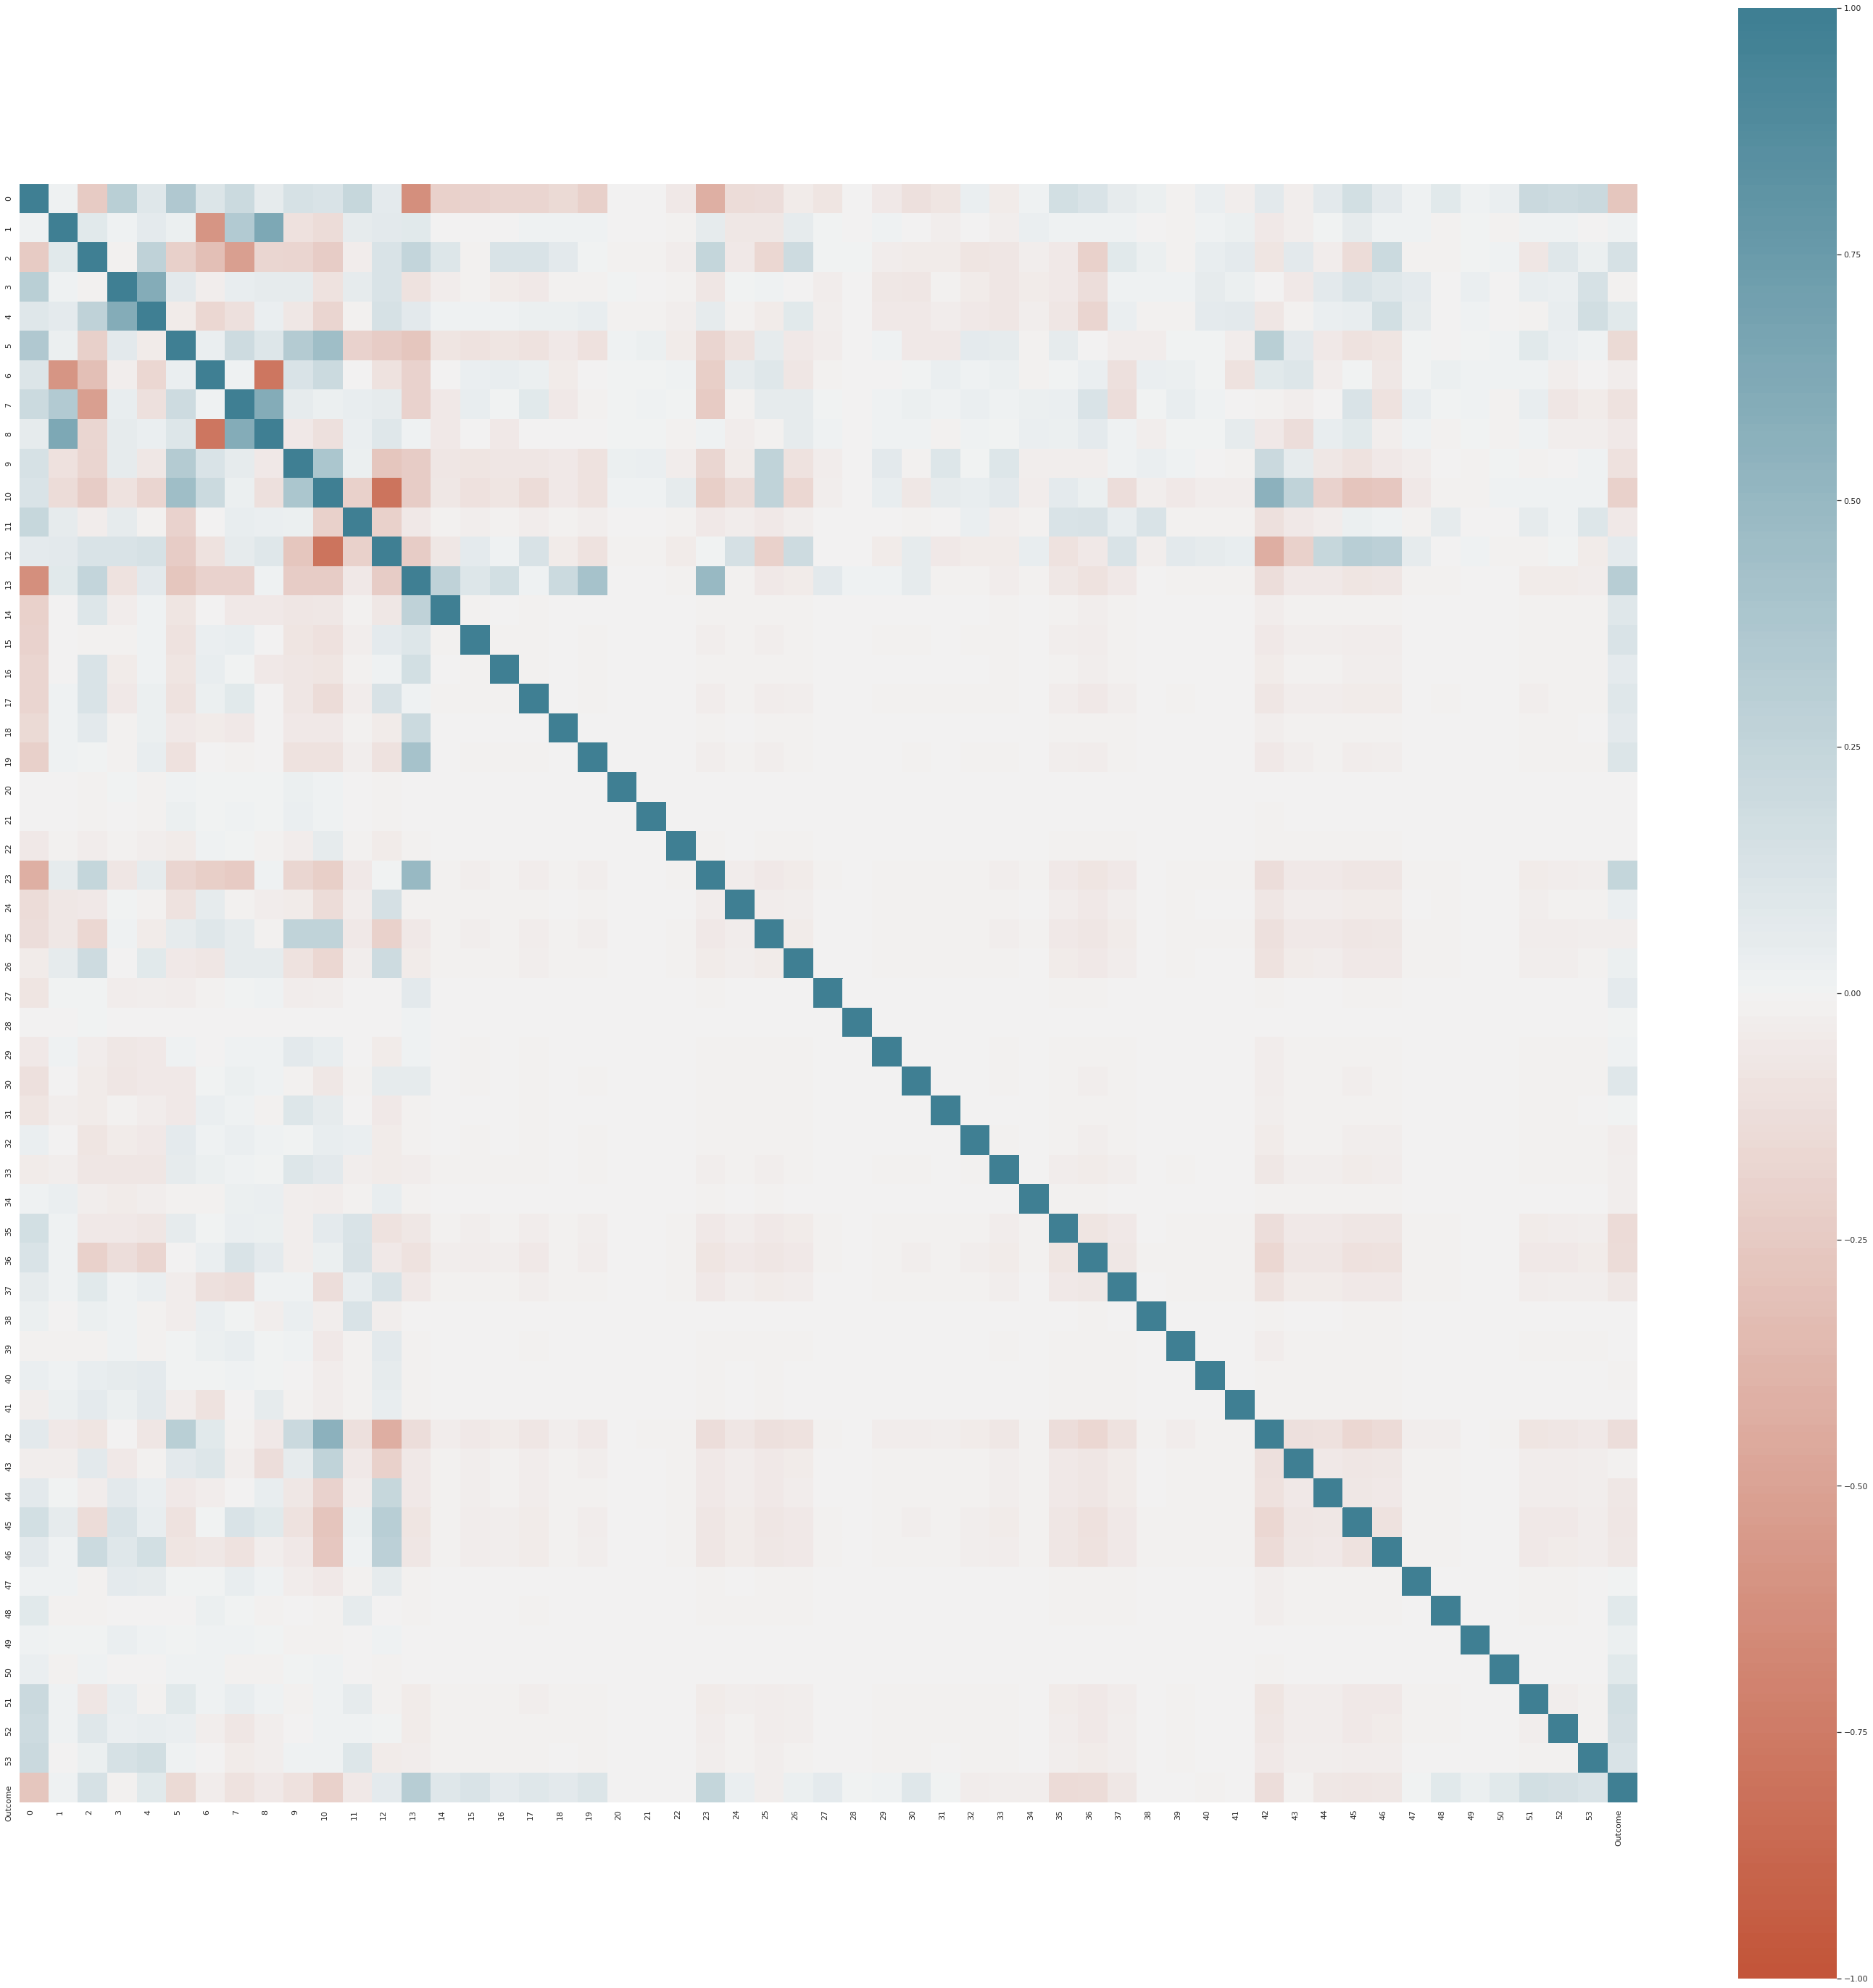

In [570]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = Fulldata.corr()
fig= plt.subplots(figsize = [50,50])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.show()

**A high correlated function with Outcome are: 0-19 , 23 , 36-39 , 42, 50-53.**

In [571]:
FilterData=Fulldata.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,36,33,38,39,42,50,51,52,53]]
FilterData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,36,33,38,39,42,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [572]:
FilterData.shape

(581012, 30)

**Standardising X Variables**

In [573]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_stand=scaler.fit_transform(FilterData)

In [574]:
Y1.head()

,Outcome
0,5
1,5
2,2
3,2
4,5


**Label Encoding Y Values**

In [575]:
Y = pd.get_dummies(Y1['Outcome'])
Y

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
581007,0,0,1,0,0,0,0
581008,0,0,1,0,0,0,0
581009,0,0,1,0,0,0,0
581010,0,0,1,0,0,0,0


**Splitting the data**

In [576]:
from sklearn.model_selection import train_test_split
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_stand, Y, test_size=test_size, random_state=seed)

In [577]:
X_train

array([[ 0.14870359, -0.58667394, -0.01384886, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-1.11922377,  1.43274059,  0.11969395, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [ 0.14870359, -0.98876976,  1.05449363, ..., -0.16595612,
        -0.15601398, -0.12365355],
       ...,
       [-3.1407643 , -0.01480434,  2.92409298, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [ 0.83445585, -0.82793143, -0.94864854, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-0.5406203 ,  0.53919434, -0.41447729, ..., -0.16595612,
        -0.15601398, -0.12365355]])

In [578]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [579]:
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [580]:
from keras import models
from keras import layers

In [581]:
import keras
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping

initializer = keras.initializers.glorot_normal()
filepath = "weights-improvement-covtype-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01, baseline=0.75)

callbacks_list = [checkpoint, es]

model1=models.Sequential()
model1.add(layers.Dense(50,activation="sigmoid",input_shape=(30,), kernel_initializer=initializer, bias_initializer=initializer))
model1.add(layers.Dense(7,activation='softmax', kernel_initializer=initializer, bias_initializer=initializer))

In [582]:
model1.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 50)                1550      
_________________________________________________________________
dense_118 (Dense)            (None, 7)                 357       
Total params: 1,907
Trainable params: 1,907
Non-trainable params: 0
_________________________________________________________________


In [583]:
model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [584]:
history=model1.fit(X_train, y_train, epochs=20,batch_size=50, verbose=1, validation_split=0.25,callbacks=callbacks_list)

Epoch 1/20
6947/6973 [============================>.] - ETA: 0s - loss: 0.6936 - accuracy: 0.7067
Epoch 00001: val_accuracy improved from -inf to 0.72768, saving model to weights-improvement-covtype-01-0.73.hdf5
6973/6973 [==============================] - 10s 1ms/step - loss: 0.6933 - accuracy: 0.7068 - val_loss: 0.6276 - val_accuracy: 0.7277
Epoch 2/20
6963/6973 [============================>.] - ETA: 0s - loss: 0.6094 - accuracy: 0.7374
Epoch 00002: val_accuracy improved from 0.72768 to 0.74582, saving model to weights-improvement-covtype-02-0.75.hdf5
6973/6973 [==============================] - 10s 1ms/step - loss: 0.6094 - accuracy: 0.7374 - val_loss: 0.5881 - val_accuracy: 0.7458
Epoch 3/20
6943/6973 [============================>.] - ETA: 0s - loss: 0.5793 - accuracy: 0.7523
Epoch 00003: val_accuracy improved from 0.74582 to 0.76014, saving model to weights-improvement-covtype-03-0.76.hdf5
6973/6973 [==============================] - 10s 1ms/step - loss: 0.5792 - accuracy: 0.752

In [585]:
models_new=models.Sequential()
models_new.add(layers.Dense(50,activation="sigmoid",input_shape=(30,), kernel_initializer=initializer, bias_initializer=initializer))
models_new.add(layers.Dense(7,activation='softmax', kernel_initializer=initializer, bias_initializer=initializer))

#Using callback to load weights of Train model in the test model 
models_new.load_weights("weights-improvement-covtype-20-0.81.hdf5")

models_new.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

test_loss, test_acc = models_new.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.8f' % ( test_acc))
print('Test Loss: %.3f' % ( test_loss)) 


Test Accuracy: 0.80674338
Test Loss: 0.461


**Accuracy ~ 80% in Training,Validation & Testing Dataset (i.e.above 75% Benchmark)**

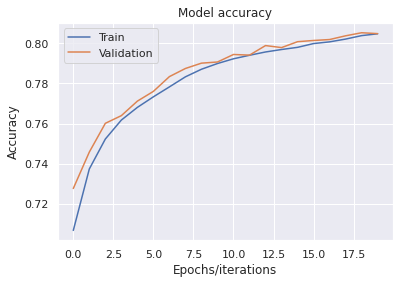

In [586]:
#Plotting accuracy of Training & Validation Data

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

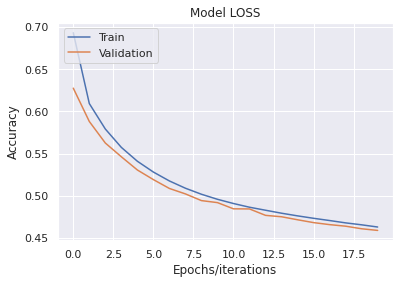

In [587]:
#Plotting Loss of Training & Validation Data

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

**Callback is used here to save the improved model.**

**Hyper-Parameter used here are:**

1)Made 1st Layer of Sigmoid Activation and the input dimension = 30 as 30 variables in dataset.

2)Added 2nd Layer of Softmax that is also the output layer and 7 classes so choose 7 as next layer shape.

3)Have added a keras initializer while defining both the Layers.

4)Optimizer used:Adam for faster convergence.

5)Metrics: Accuracy to find accuray atlast.

6)loss='categorical_crossentropy' as it has 7 different classes

7)Have splited in 60:20:20 model of Train:Validation:Test

8)Callbackused are: earlystopping, modelcheckpoint.

9)Epoch=20 & Batch_size=50 & Steps_per_epoch=6973

# **Dataset: kddcup99**

In [588]:
import pandas as pd
from sklearn.datasets import fetch_kddcup99
#Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_kddcup99.html#sklearn.datasets.fetch_kddcup99

kddcup99 = fetch_kddcup99()
x_fetch_kddcup99 = kddcup99.data
y_fetch_kddcup99 = kddcup99.target
X = pd.DataFrame(x_fetch_kddcup99)
Y = pd.DataFrame(y_fetch_kddcup99)
print(X.shape)
print(Y.shape)

(494021, 41)
(494021, 1)


In [589]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in [1,2,3]:
  X[i] = [j.decode('utf-8') for j in X[i]]
  X[i] = le.fit_transform(X[i])

for i in range(X.shape[1]):
  X[i] = X[i].astype('float')

In [590]:
Y = [i.decode('utf-8') for i in y_fetch_kddcup99]
Y = pd.DataFrame(le.fit_transform(Y))

In [591]:
Y.columns=["Outcome"]

In [592]:
Y.head()

,Outcome
0,11
1,11
2,11
3,11
4,11


In [593]:
Y['Outcome'].nunique()

23

In [594]:
X.isnull().sum().sum()

0

**The dataset does not consist of Null values**

In [595]:
Y1=pd.DataFrame(Y.copy())

In [596]:
Fulldata = pd.concat([X,Y1], axis=1)
Fulldata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,Outcome
0,0.0,1.0,22.0,9.0,181.0,5450.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,11
1,0.0,1.0,22.0,9.0,239.0,486.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,11
2,0.0,1.0,22.0,9.0,235.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,11
3,0.0,1.0,22.0,9.0,219.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.0,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,11
4,0.0,1.0,22.0,9.0,217.0,2032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,11


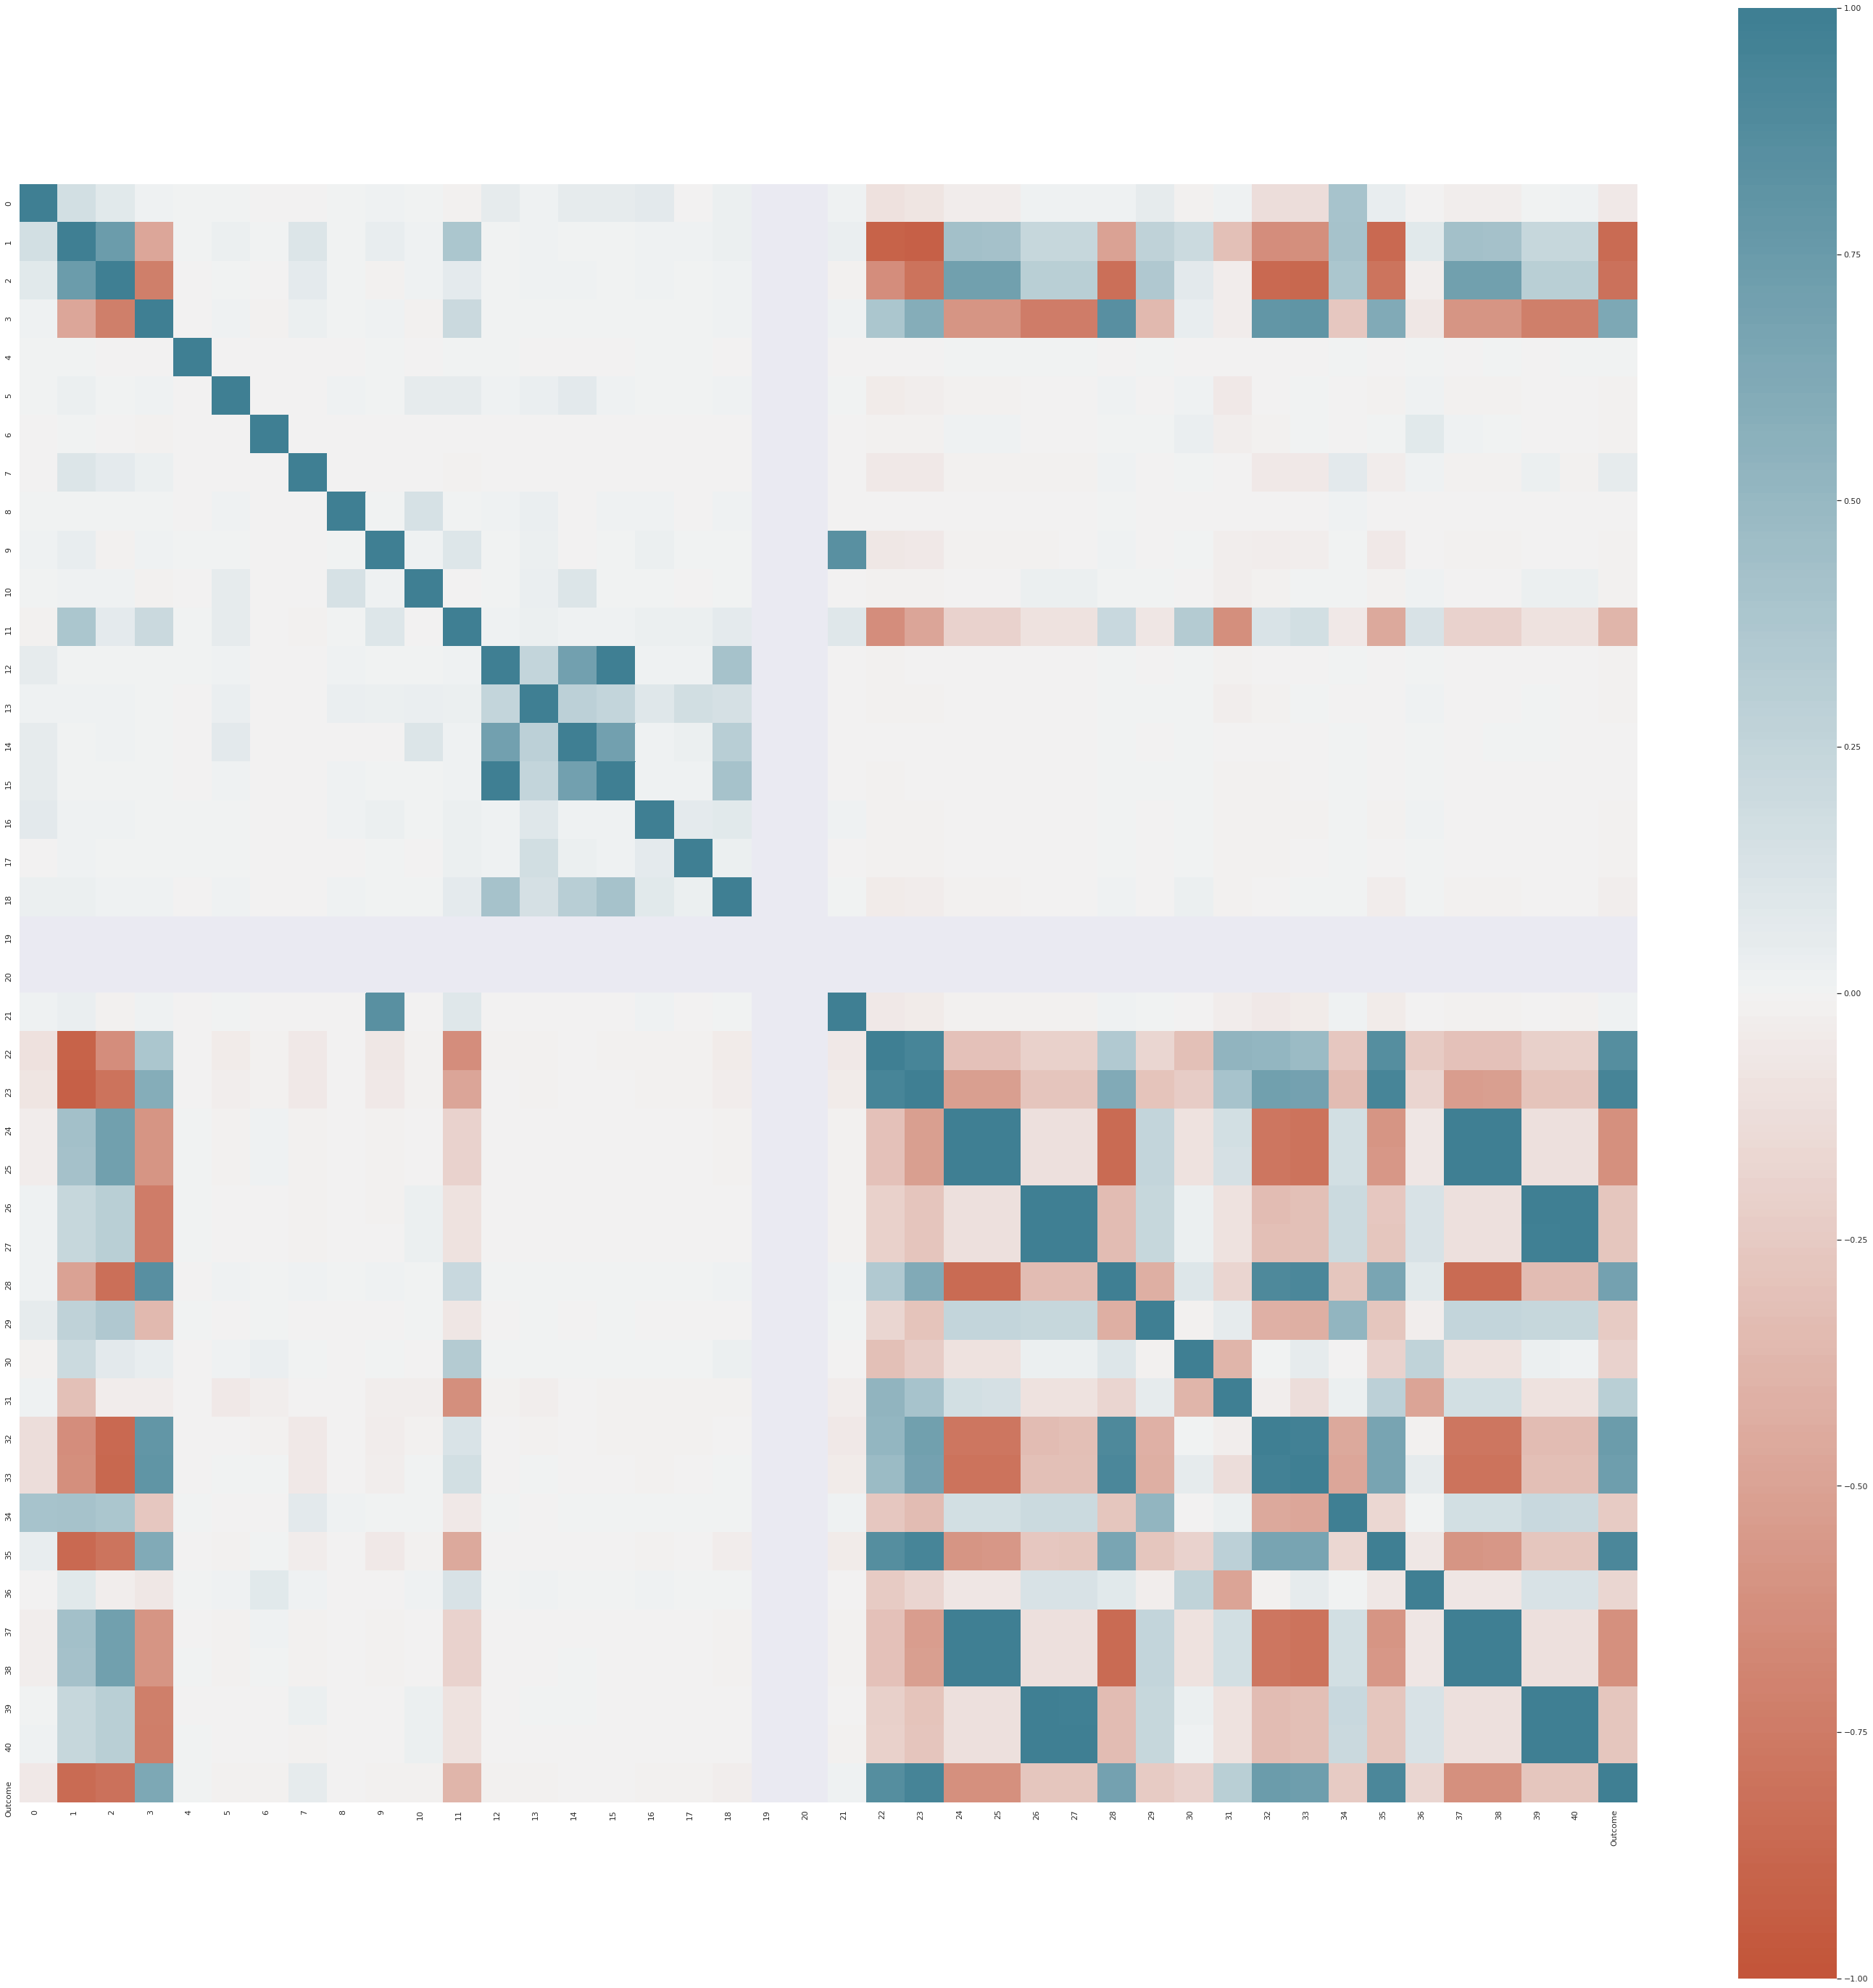

In [597]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = Fulldata.corr()
fig= plt.subplots(figsize = [50,50])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.show()

In [598]:
FilterData=Fulldata.iloc[:,[0,1,2,3,11,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]
FilterData.head()

,0,1,2,3,11,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,0.0,1.0,22.0,9.0,1.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,22.0,9.0,1.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,22.0,9.0,1.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,22.0,9.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.0,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,22.0,9.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49.0,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [599]:
FilterData.shape

(494021, 24)

**Standardising of X Variables**

In [600]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_stand=scaler.fit_transform(FilterData)

In [601]:
Y1.head()

,Outcome
0,11
1,11
2,11
3,11
4,11


**Label Enncoding Y Values**

In [602]:
Y = pd.get_dummies(Y1['Outcome'])
Y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
494017,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
494018,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
494019,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


**Splitting the Data**

In [603]:
from sklearn.model_selection import train_test_split
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_stand, Y, test_size=test_size, random_state=seed)

In [604]:
X_train

array([[-0.06779172, -0.81154961, -0.69498244, ..., -0.46320239,
        -0.25203952, -0.249464  ],
       [-0.06779172,  0.92575306,  1.5948145 , ...,  2.16202721,
        -0.25203952, -0.249464  ],
       [-0.06779172,  0.92575306, -0.1040671 , ..., -0.46320239,
        -0.25203952, -0.249464  ],
       ...,
       [-0.06779172,  2.66305573,  1.22549241, ..., -0.46320239,
         1.65611515, -0.249464  ],
       [-0.06779172,  0.92575306, -0.1040671 , ..., -0.46320239,
        -0.25203952, -0.249464  ],
       [-0.06779172,  0.92575306,  1.5948145 , ...,  2.16202721,
        -0.25203952, -0.249464  ]])

In [605]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [606]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [607]:
X_stand.shape

(494021, 24)

In [608]:
Y1['Outcome'].nunique()

23

In [609]:
initializer = keras.initializers.glorot_normal()
filepath = "weights-improvement-kdcup99-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01, baseline=0.5)

callbacks_list = [checkpoint, es]

model1=models.Sequential()
model1.add(layers.Dense(60,activation="sigmoid",input_shape=(24,), kernel_initializer=initializer, bias_initializer=initializer))
model1.add(layers.Dense(23,activation='softmax', kernel_initializer=initializer, bias_initializer=initializer))

In [610]:
model1.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 60)                1500      
_________________________________________________________________
dense_122 (Dense)            (None, 23)                1403      
Total params: 2,903
Trainable params: 2,903
Non-trainable params: 0
_________________________________________________________________


In [611]:
model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [612]:
history=model1.fit(X_train, y_train, epochs=20,batch_size=50, verbose=1, validation_split=0.25,callbacks=callbacks_list)

Epoch 1/20
5909/5929 [============================>.] - ETA: 0s - loss: 0.0840 - accuracy: 0.9826
Epoch 00001: val_accuracy improved from -inf to 0.99169, saving model to weights-improvement-kdcup99-01-0.99.hdf5
5929/5929 [==============================] - 9s 1ms/step - loss: 0.0838 - accuracy: 0.9826 - val_loss: 0.0281 - val_accuracy: 0.9917
Epoch 2/20
5891/5929 [============================>.] - ETA: 0s - loss: 0.0211 - accuracy: 0.9932
Epoch 00002: val_accuracy improved from 0.99169 to 0.99444, saving model to weights-improvement-kdcup99-02-0.99.hdf5
5929/5929 [==============================] - 9s 1ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0167 - val_accuracy: 0.9944
Epoch 3/20
5915/5929 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9955
Epoch 00003: val_accuracy improved from 0.99444 to 0.99621, saving model to weights-improvement-kdcup99-03-1.00.hdf5
5929/5929 [==============================] - 9s 1ms/step - loss: 0.0134 - accuracy: 0.9955 -

In [613]:
models_new=models.Sequential()
models_new.add(layers.Dense(60,activation="sigmoid",input_shape=(24,), kernel_initializer=initializer, bias_initializer=initializer))
models_new.add(layers.Dense(23,activation='softmax', kernel_initializer=initializer, bias_initializer=initializer))

#Using callback to load weights of Train model in the test model 
models_new.load_weights("weights-improvement-kdcup99-10-1.00.hdf5")

models_new.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

test_loss, test_acc = models_new.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.8f' % ( test_acc))
print('Test Loss: %.3f' % ( test_loss)) 


Test Accuracy: 0.99798596
Test Loss: 0.007


**Accuracy coming around ~ 99% in Training,Validation & Testing Dataset (i.e.above 75% Benchmark)**

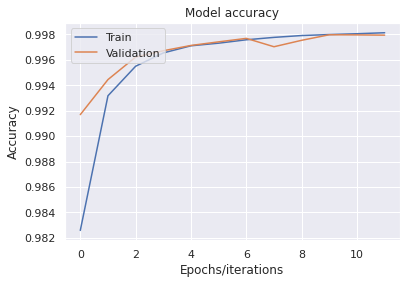

In [614]:
#Plotting accuracy of Training & Validation data

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

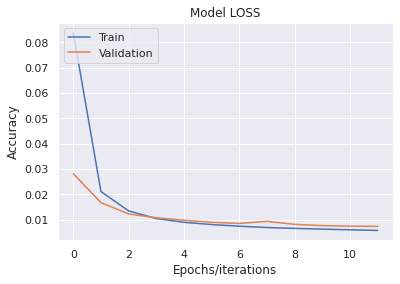

In [615]:
#Plotting loss of Training & Validation data

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

**Callback is used here to save the improved model.**

**Hyper-Parameter used here are:**

1)Made 1st Layer of Sigmoid Activation and the input dimension = 24 as 24 variables in dataset.

2)Added 2nd Layer of Softmax that is also the output layer and 23 classes so choose 23 as next layer shape.

3)Have added a keras initializer while defining both the Layers.

4)Optimizer used:Adam for faster convergence.

5)Metrics: Accuracy to find accuray atlast.

6)loss='categorical_crossentropy' as it has 23 different classes

7)Have splited in 60:20:20 model of Train:Validation:Test

8)Callbackused are: earlystopping, modelcheckpoint.

9)Epoch=20 & Batch_size=50 & Steps_per_epoch=5929

# **datasets: load_breast_cancer()**

In [616]:
from sklearn.datasets import load_breast_cancer
#Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

cancer = load_breast_cancer()
x_breast_cancer = cancer.data
y_breast_cancer = cancer.target

In [617]:
x_can = pd.DataFrame(x_breast_cancer)
y_can = pd.DataFrame(y_breast_cancer)
print(x_can.shape)
print(y_can.shape)

(569, 30)
(569, 1)


In [618]:
print(x_can.isnull().sum().sum())

0


**The dataset does not consist of Null values**

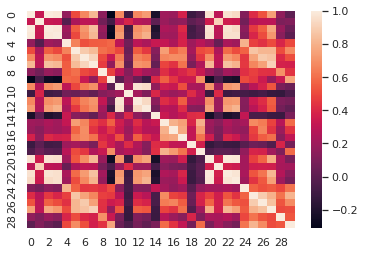

In [619]:
corr = x_can.corr()
sns.set()
ax = sns.heatmap(corr)

**Standardising X variables**

In [620]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_can = pd.DataFrame(scaler.fit_transform(x_can))

In [621]:
x_train, x_test, y_train, y_test = train_test_split(x_can, y_can, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(455, 30)
(57, 30)
(57, 30)
(455, 1)
(57, 1)
(57, 1)


**Label Encoding of Y Values is not needed because it is already in the binary format**

In [622]:
nn_cancer = models.Sequential()
nn_cancer.add(layers.Dense(256, activation = 'relu', input_shape = (30, )))
nn_cancer.add(layers.Dense(125, activation = 'relu'))
nn_cancer.add(layers.Dense(1, activation = 'sigmoid'))
nn_cancer.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [623]:
can_hist = nn_cancer.fit(x_train, y_train, epochs=15,batch_size=10, validation_data = (x_val, y_val))

Epoch 1/15
46/46 [==============================] - 0s 5ms/step - loss: 0.4770 - accuracy: 0.8835 - val_loss: 0.3497 - val_accuracy: 0.9123
Epoch 2/15
46/46 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.9319 - val_loss: 0.2603 - val_accuracy: 0.9123
Epoch 3/15
46/46 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9385 - val_loss: 0.2195 - val_accuracy: 0.9123
Epoch 4/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9538 - val_loss: 0.1989 - val_accuracy: 0.9123
Epoch 5/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1509 - accuracy: 0.9604 - val_loss: 0.1850 - val_accuracy: 0.9474
Epoch 6/15
46/46 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.9692 - val_loss: 0.1758 - val_accuracy: 0.9474
Epoch 7/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1198 - accuracy: 0.9714 - val_loss: 0.1694 - val_accuracy: 0.9474
Epoch 8/15
46/46 [==

In [624]:
val_acc = nn_cancer.evaluate(x_val, y_val)[1]
print('The Validation accuracy is', val_acc)

2/2 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9649
The Validation accuracy is 0.9649122953414917


In [625]:
test_acc = nn_cancer.evaluate(x_test, y_test)[1]
print('The test accuracy is', test_acc)

2/2 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 1.0000
The test accuracy is 1.0


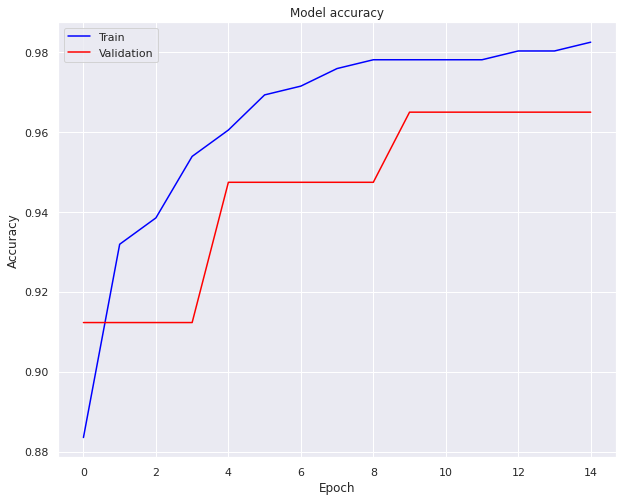

In [626]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.plot(can_hist.history['accuracy'], color = 'blue')
plt.plot(can_hist.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

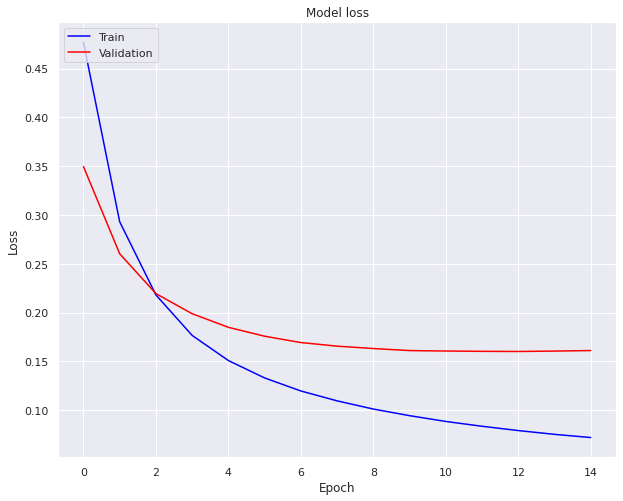

In [627]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.plot(can_hist.history['loss'], color = 'blue')
plt.plot(can_hist.history['val_loss'], color = 'red')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Dataset: load_wine()**

In [628]:
import pandas as pd
from sklearn.datasets import load_wine
#Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

wine = load_wine()
x_wine = wine.data
y_wine = wine.target
X = pd.DataFrame(x_wine)
Y = pd.DataFrame(y_wine)
print(X.shape)
print(Y.shape)

(178, 13)
(178, 1)


In [629]:
Y.columns=["Outcome"]

In [630]:
Y.head()

,Outcome
0,0
1,0
2,0
3,0
4,0


In [631]:
Y['Outcome'].nunique()

3

In [632]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [633]:
Y1=pd.DataFrame(Y.copy())

In [634]:
Fulldata = pd.concat([X,Y1], axis=1)
Fulldata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Outcome
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


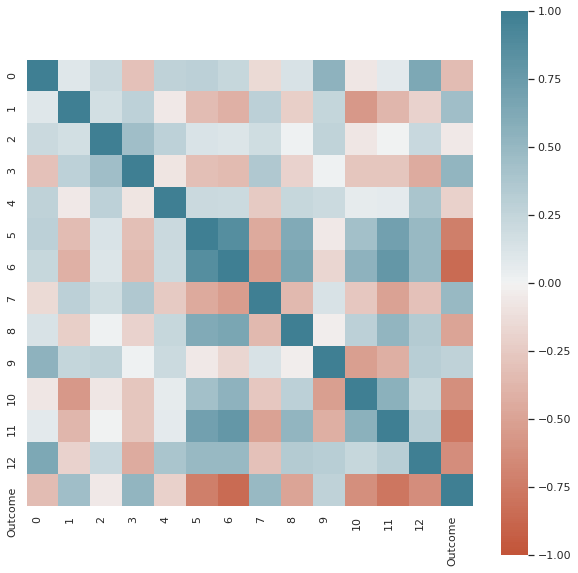

In [635]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = Fulldata.corr()
fig= plt.subplots(figsize = [10,10])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

plt.show()

In [636]:
FilterData=Fulldata.iloc[:,0:13]
FilterData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [637]:
FilterData.shape

(178, 13)

In [638]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_stand=scaler.fit_transform(FilterData)

In [639]:
Y1.head()

,Outcome
0,0
1,0
2,0
3,0
4,0


In [640]:
Y = pd.get_dummies(Y1['Outcome'])
Y

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [641]:
from sklearn.model_selection import train_test_split
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_stand, Y, test_size=test_size, random_state=seed)

In [642]:
X_train

array([[ 0.06099988, -0.54429654, -1.19353041, ...,  0.71316437,
         0.42135232,  1.28369089],
       [ 0.90098006, -0.75075906,  1.21899459, ...,  1.02027808,
         0.13886376,  1.71359755],
       [-1.23602833,  0.98173081, -1.33974405, ..., -0.12042998,
         0.61909432, -0.58242244],
       ...,
       [-0.37134286,  1.08945039, -0.02382132, ..., -0.77853079,
        -1.86680504, -0.46778066],
       [-0.71721705,  0.19178724, -0.352802  , ..., -0.42754369,
         0.97220502, -1.37536138],
       [-1.43367073, -1.29833358,  0.78035368, ..., -0.7346574 ,
         0.6614676 , -0.72254016]])

In [643]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [644]:
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0,

In [645]:
X_stand.shape

(178, 13)

In [646]:
Y1['Outcome'].nunique()

3

In [647]:
model1=models.Sequential()
model1.add(layers.Dense(256,activation="relu",input_shape=(13,)))
model1.add(layers.Dense(128,activation='relu'))
model1.add(layers.Dense(64,activation='relu'))
model1.add(layers.Dense(3,activation='sigmoid'))

In [648]:
model1.summary()

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 256)               3584      
_________________________________________________________________
dense_129 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_130 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_131 (Dense)            (None, 3)                 195       
Total params: 44,931
Trainable params: 44,931
Non-trainable params: 0
_________________________________________________________________


In [649]:
model1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [651]:
history=model1.fit(X_train, y_train, epochs=30, validation_split=0.25)

Epoch 1/30
4/4 [==============================] - 0s 34ms/step - loss: 1.1054 - accuracy: 0.1509 - val_loss: 1.1092 - val_accuracy: 0.1389
Epoch 2/30
4/4 [==============================] - 0s 6ms/step - loss: 1.0963 - accuracy: 0.2075 - val_loss: 1.1023 - val_accuracy: 0.2222
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 1.0878 - accuracy: 0.2736 - val_loss: 1.0947 - val_accuracy: 0.3056
Epoch 4/30
4/4 [==============================] - 0s 6ms/step - loss: 1.0798 - accuracy: 0.3208 - val_loss: 1.0878 - val_accuracy: 0.3611
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 1.0710 - accuracy: 0.4717 - val_loss: 1.0808 - val_accuracy: 0.4444
Epoch 6/30
4/4 [==============================] - 0s 6ms/step - loss: 1.0628 - accuracy: 0.5566 - val_loss: 1.0739 - val_accuracy: 0.4444
Epoch 7/30
4/4 [==============================] - 0s 7ms/step - loss: 1.0549 - accuracy: 0.6509 - val_loss: 1.0672 - val_accuracy: 0.4722
Epoch 8/30
4/4 [=================

In [652]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('Test Accuracy: %.8f' % ( test_acc))
print('Test Loss: %.3f' % ( test_loss)) 

2/2 [==============================] - 0s 2ms/step - loss: 0.8795 - accuracy: 0.6944
Test Accuracy: 0.69444442
Test Loss: 0.880


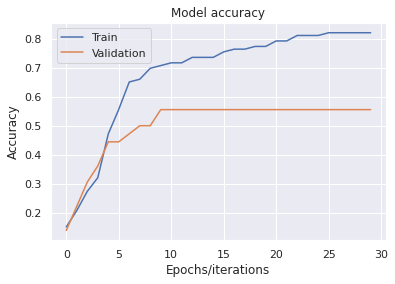

In [653]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

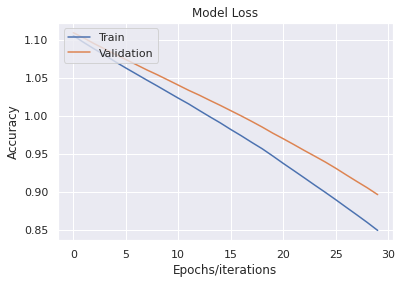

In [654]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()